#**Brief Given Details of the Dataset**

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

**122 instances for each region.**

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

#**Inference from the given information about the dataset**
1. 122 rows for each region(total 244)
2. Date columns can be merged.
3. Except for final output and date column other column appears to have numerical value.
4. we may add one more column named region for the distinguishing the data of regions on the base of numerical value of 0 and 1

#**1.Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#**2. Loading the csv in the dataframe and removing the first row with header = 1**

In [5]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)  
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#**3. Preparing the dataframe**

**a) Creating a copy of the dataframe**

In [103]:
df1 = df.copy()
df1.loc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


**b) Stripping the whitespace in all columns heads**

In [104]:
df1.columns = df1.columns.str.strip() 

**c) Viewing the columns of the dataset**

In [106]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

**d)  Removing the row no. 122-124**

In [107]:
df1.drop([122,123,124], inplace = True)

 **e) Creating a new Column Region**
 
i).  1 for  Bejaia region located in the northeast of Algeria          
ii). 0 for Sidi Bel-abbes region located in the northwest of Algeria.







In [109]:
df1.loc[:121,'region']=1
df1.loc[124:,'region']=0

**f) Show Top 5 Records of the new dataframe**

In [110]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


#**4. More Information about the dataset**

**a) Size of the dataset**

In [61]:
df1.shape

(244, 14)

**Observation**: Total no of rows of data is 244 with 13 columns

**b)get the datatype of the columns**

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      244 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.6+ KB


**Observation:** 
1. 14 columns are object data type
2. Region having float64 datatype
2. All 244 count of columns are not null except for FWI columns


**c) Finding the row with null value**

In [112]:
df1[df1.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,fire,0.0


**Observation**
1.  Row No. 168 has FWI value as NAN

**d)Segregate the dataset into categorical and numerical**



In [113]:
numerical_features   = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']


In [114]:
print('Numerical features: {} - {}'.format(len(numerical_features), numerical_features))
print('categorical features: {} - {}'.format(len(categorical_features), categorical_features))

Numerical features: 1 - ['region']
categorical features: 14 - ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


**Observation**
1.  There is only one numerical features that is region(derived one)
2.  Else are Categorical though but have numerical features.

#**Now final information about all the features drew from above**


1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
2.  RH : Relative Humidity(Relative humidity (RH) refers to the moisture content (i.e., water vapor) of the atmosphere, expressed as a percentage of the amount of moisture that can be retained by the atmosphere (moisture-holding capacity) at a given temperature and pressure without condensation.) in %: 21 to 90
3.  Ws :Wind speed in km/h: 6 to 29
4.  Rain: total day in mm: 0 to 16.8 FWI Components
5.  Fine Fuel Moisture Code (FFMC)( a numeric rating of the moisture content of litter and other cured fine fuels This code is an indicator of the relative ease of ignition and the flammability of fine fuel.): 28.6 to 92.5
6.  Duff Moisture Code (DMC) ( the moisture content of loosely compacted, decomposing organic matter weighing about 5 kg/m2 when dry.): 1.1 to 65.9
7.  Drought Code (DC) (This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.): 7 to 220.4
8.  Initial Spread Index (ISI) (a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC): 0 to 18.5
9.  Buildup Index (BUI) The BUI represents the total amount of fuel available to the spreading fire. It is a combination of the DMC and the DC: 1.1 to 68
10. Fire Weather Index (FWI)(give an index of a fire's rate of spread ): 0 to 31.1
11. Classes: two classes, namely fire and not fire
12. Date(month, year, date): date of the event recorded
13. Region: based on the two regions 0 and 1


**Observation** Now looking and understandig the features of the dataset we can see that features 1-10 are numerical in nature and hava a effect on the Output(Classes). We may convert them to numerical(float) datatype to visualize their componental contribution in the forest fire.

#**5. Based on the observation some work**

**a) view the columns in the datset**

In [147]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

**b) create a list of features to be converted into numerical form**

In [115]:
num = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI']

**c) converting the list of features variables into numerical**

In [116]:
df1[num] = df1[num].apply(pd.to_numeric)

**d) inspecting the Classes column with two values fire and not fire**

In [128]:
df1['Classes'].unique().size

8

**Observation**
1. 8 unqiue values are there instead of 2 because of unnecessary white spaces.
2. We need to remove white spaces in the next step.

**e) removing the whitespace so that two unique values only found**

In [129]:
df1['Classes'] = df1['Classes'].str.strip()

**e) final datatype of column variables**

In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(8), int64(3), object(4)
memory usage: 38.6+ KB


**Observations:**
1. Day, Month, Year, Classes - Categorical
2. Else Numerical

**f) list of numerical features and categorical features**

In [132]:
numerical_features   = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']


#**6. Now lets see the plot view relationship and behaviour of the variables**

**a) Univariate analysis of Numerical Features**

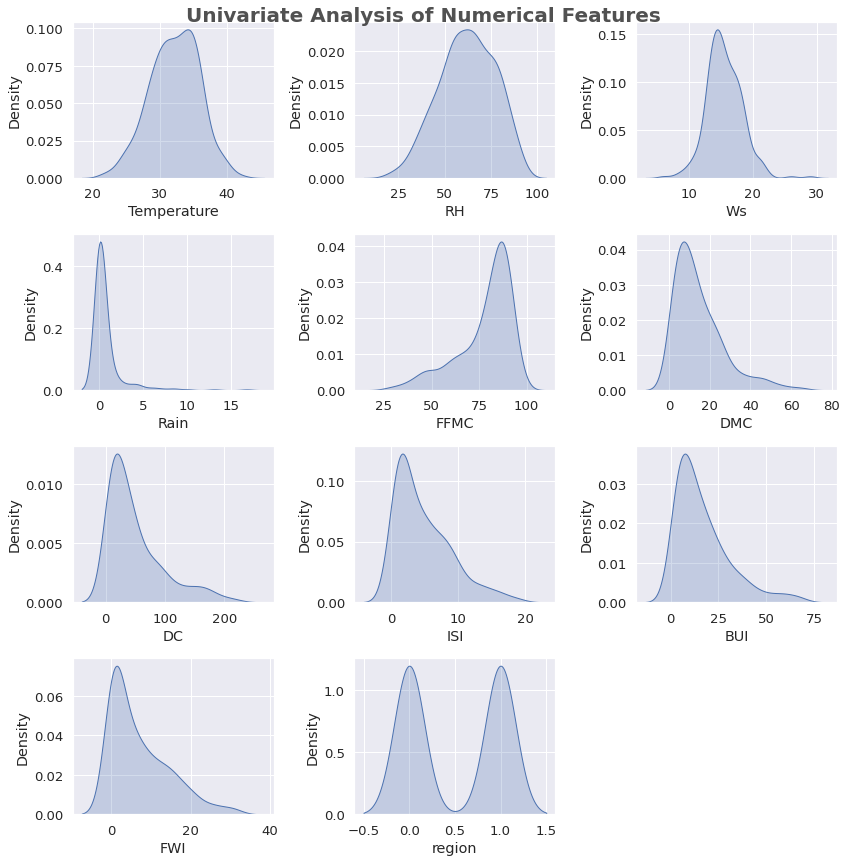

In [133]:
plt.figure(figsize=(12, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df1[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Observations**

1. Temperature, RH are almost evenly distributed
2. Rain, DMC, DC,ISI, BUI,FWI are right screwed with ouliers.
3. WS has a outlier
4. FFMC is left skrewed and has outlier
5. Region is fairly distributed.


**b) Univariate analysis of Categorical Features**

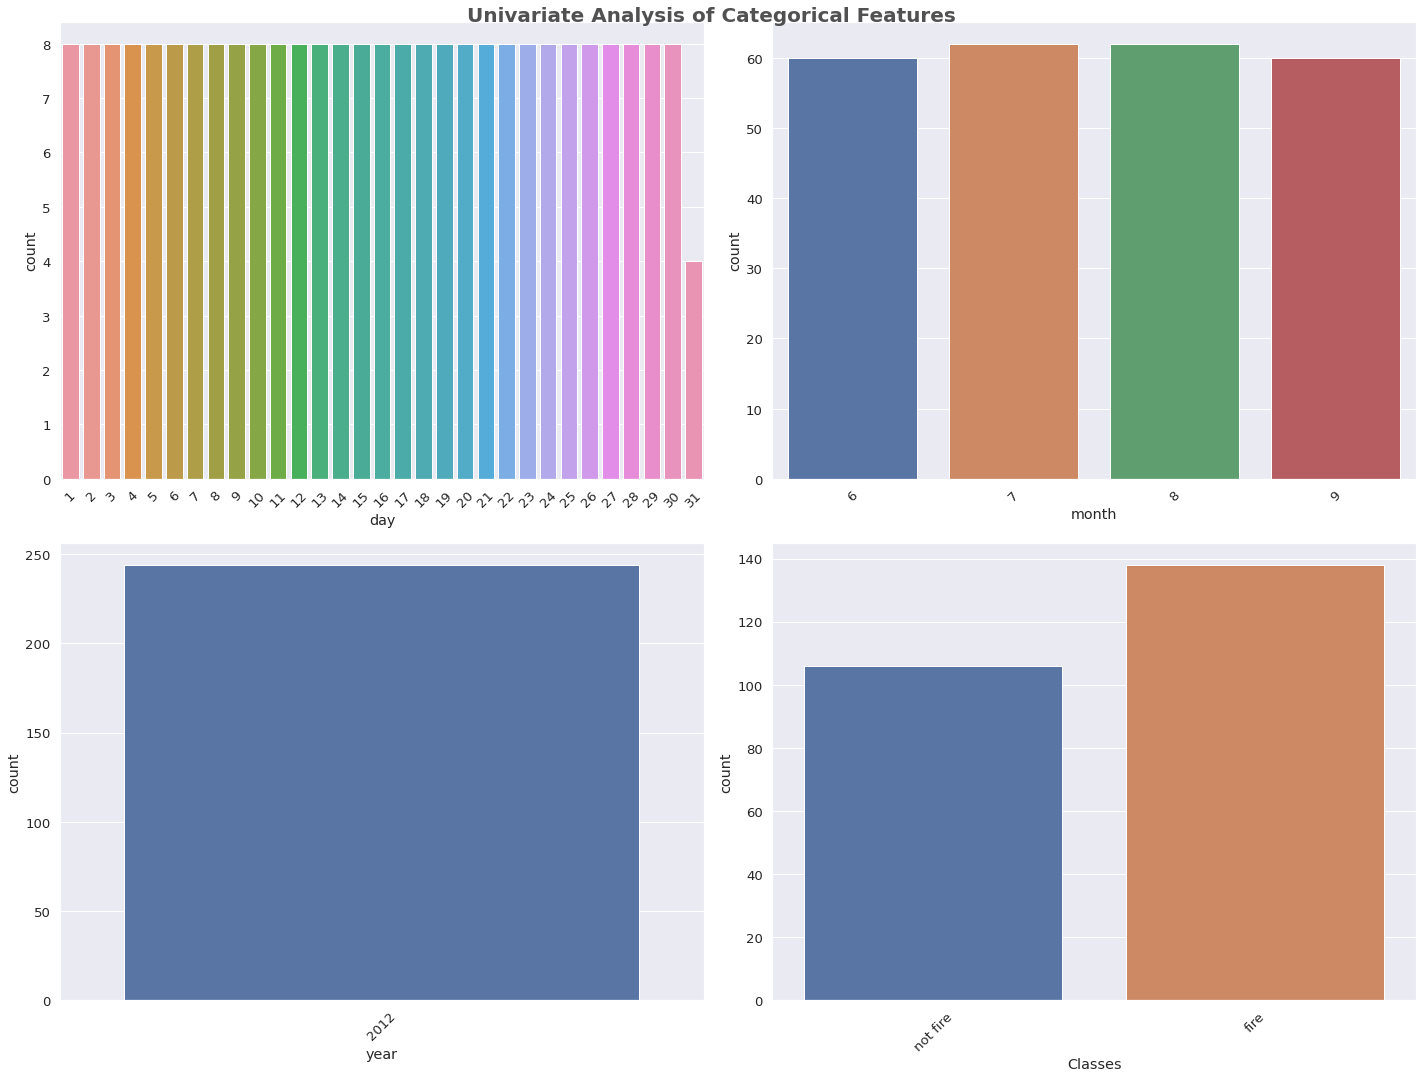

In [134]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
cat1 = [ 'day', 'month', 'year', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df1[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**Observations**

1. Month in the dataset: [6-June, 7- July, 8- August, 9- September]
2. Year: 2012
3. Fire Count: 140(aprox)
4. Not Fire Count: 105(aprox)



**c) Study Countplot of month feature with Classes as hue**

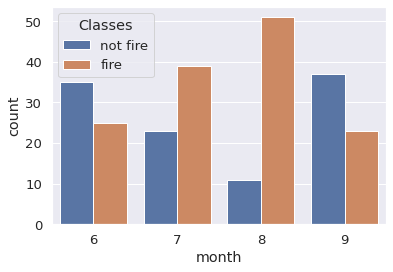

In [135]:
sns.countplot(x ='month', hue = 'Classes', data = df1)

**Observation:**
1.   Maximum Forest Fire in Month of August(50 aprox)
2.   Minimum Forest fire in Month of September(20 aprox)
3.   Maximum No Forest Fire in Month of June(35 aprox)
4.   Minimum No Forest Fire in Month of August(10 aprox)



**d) Study Countplot of day feature with Classes as hue**

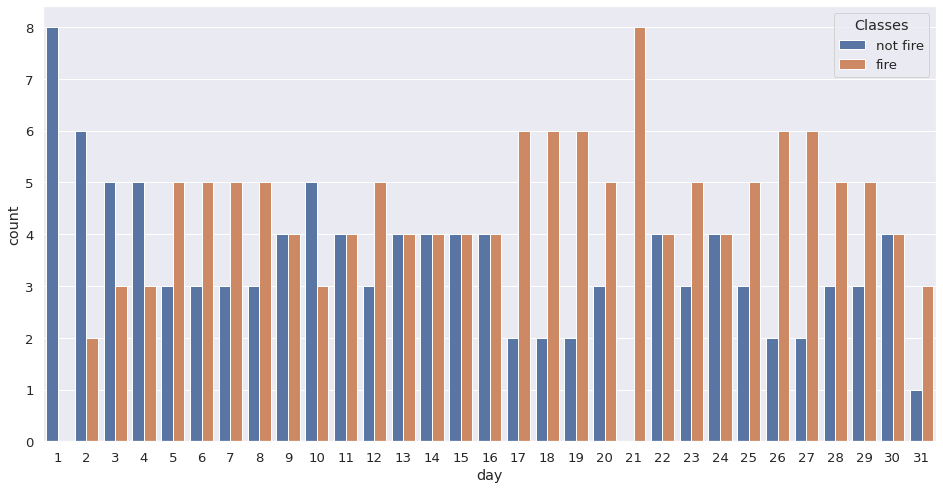

In [136]:
plt.figure(figsize = (16,8))
sns.countplot(x ='day', hue = 'Classes', data = df1)


**Observation:**
1.   Maximum Forest Fire on 21st date.(8)
2.   Minimum Forest fire on 1st date.(0)
3.   Maximum No Forest Fire on 1st date.(8)
4.   Minimum No Forest Fire 21st date(0)

Conclusion:
Every 21st of all 4 months have forest fire for both regions and Every 1st of all 4 months have no forest fire for both regions

In [137]:
df1[df1['day']=='21']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
20,21,6,2012,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,fire,1.0
50,21,7,2012,33,70,17,0.0,85.4,18.5,71.5,5.2,22.4,8.8,fire,1.0
81,21,8,2012,36,58,19,0.0,88.6,29.6,141.1,9.2,38.8,18.4,fire,1.0
112,21,9,2012,31,55,11,0.0,87.8,16.5,57.9,5.4,19.2,8.3,fire,1.0
145,21,6,2012,32,55,14,0.0,86.2,8.3,18.4,5.0,8.2,4.9,fire,0.0
175,21,7,2012,36,29,18,0.0,93.9,39.6,80.6,18.5,39.5,30.0,fire,0.0
206,21,8,2012,36,71,15,0.0,86.0,36.9,117.1,5.1,41.3,12.2,fire,0.0
237,21,9,2012,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,fire,0.0


**d) Multivariate analysis using pairplot on numerical features**

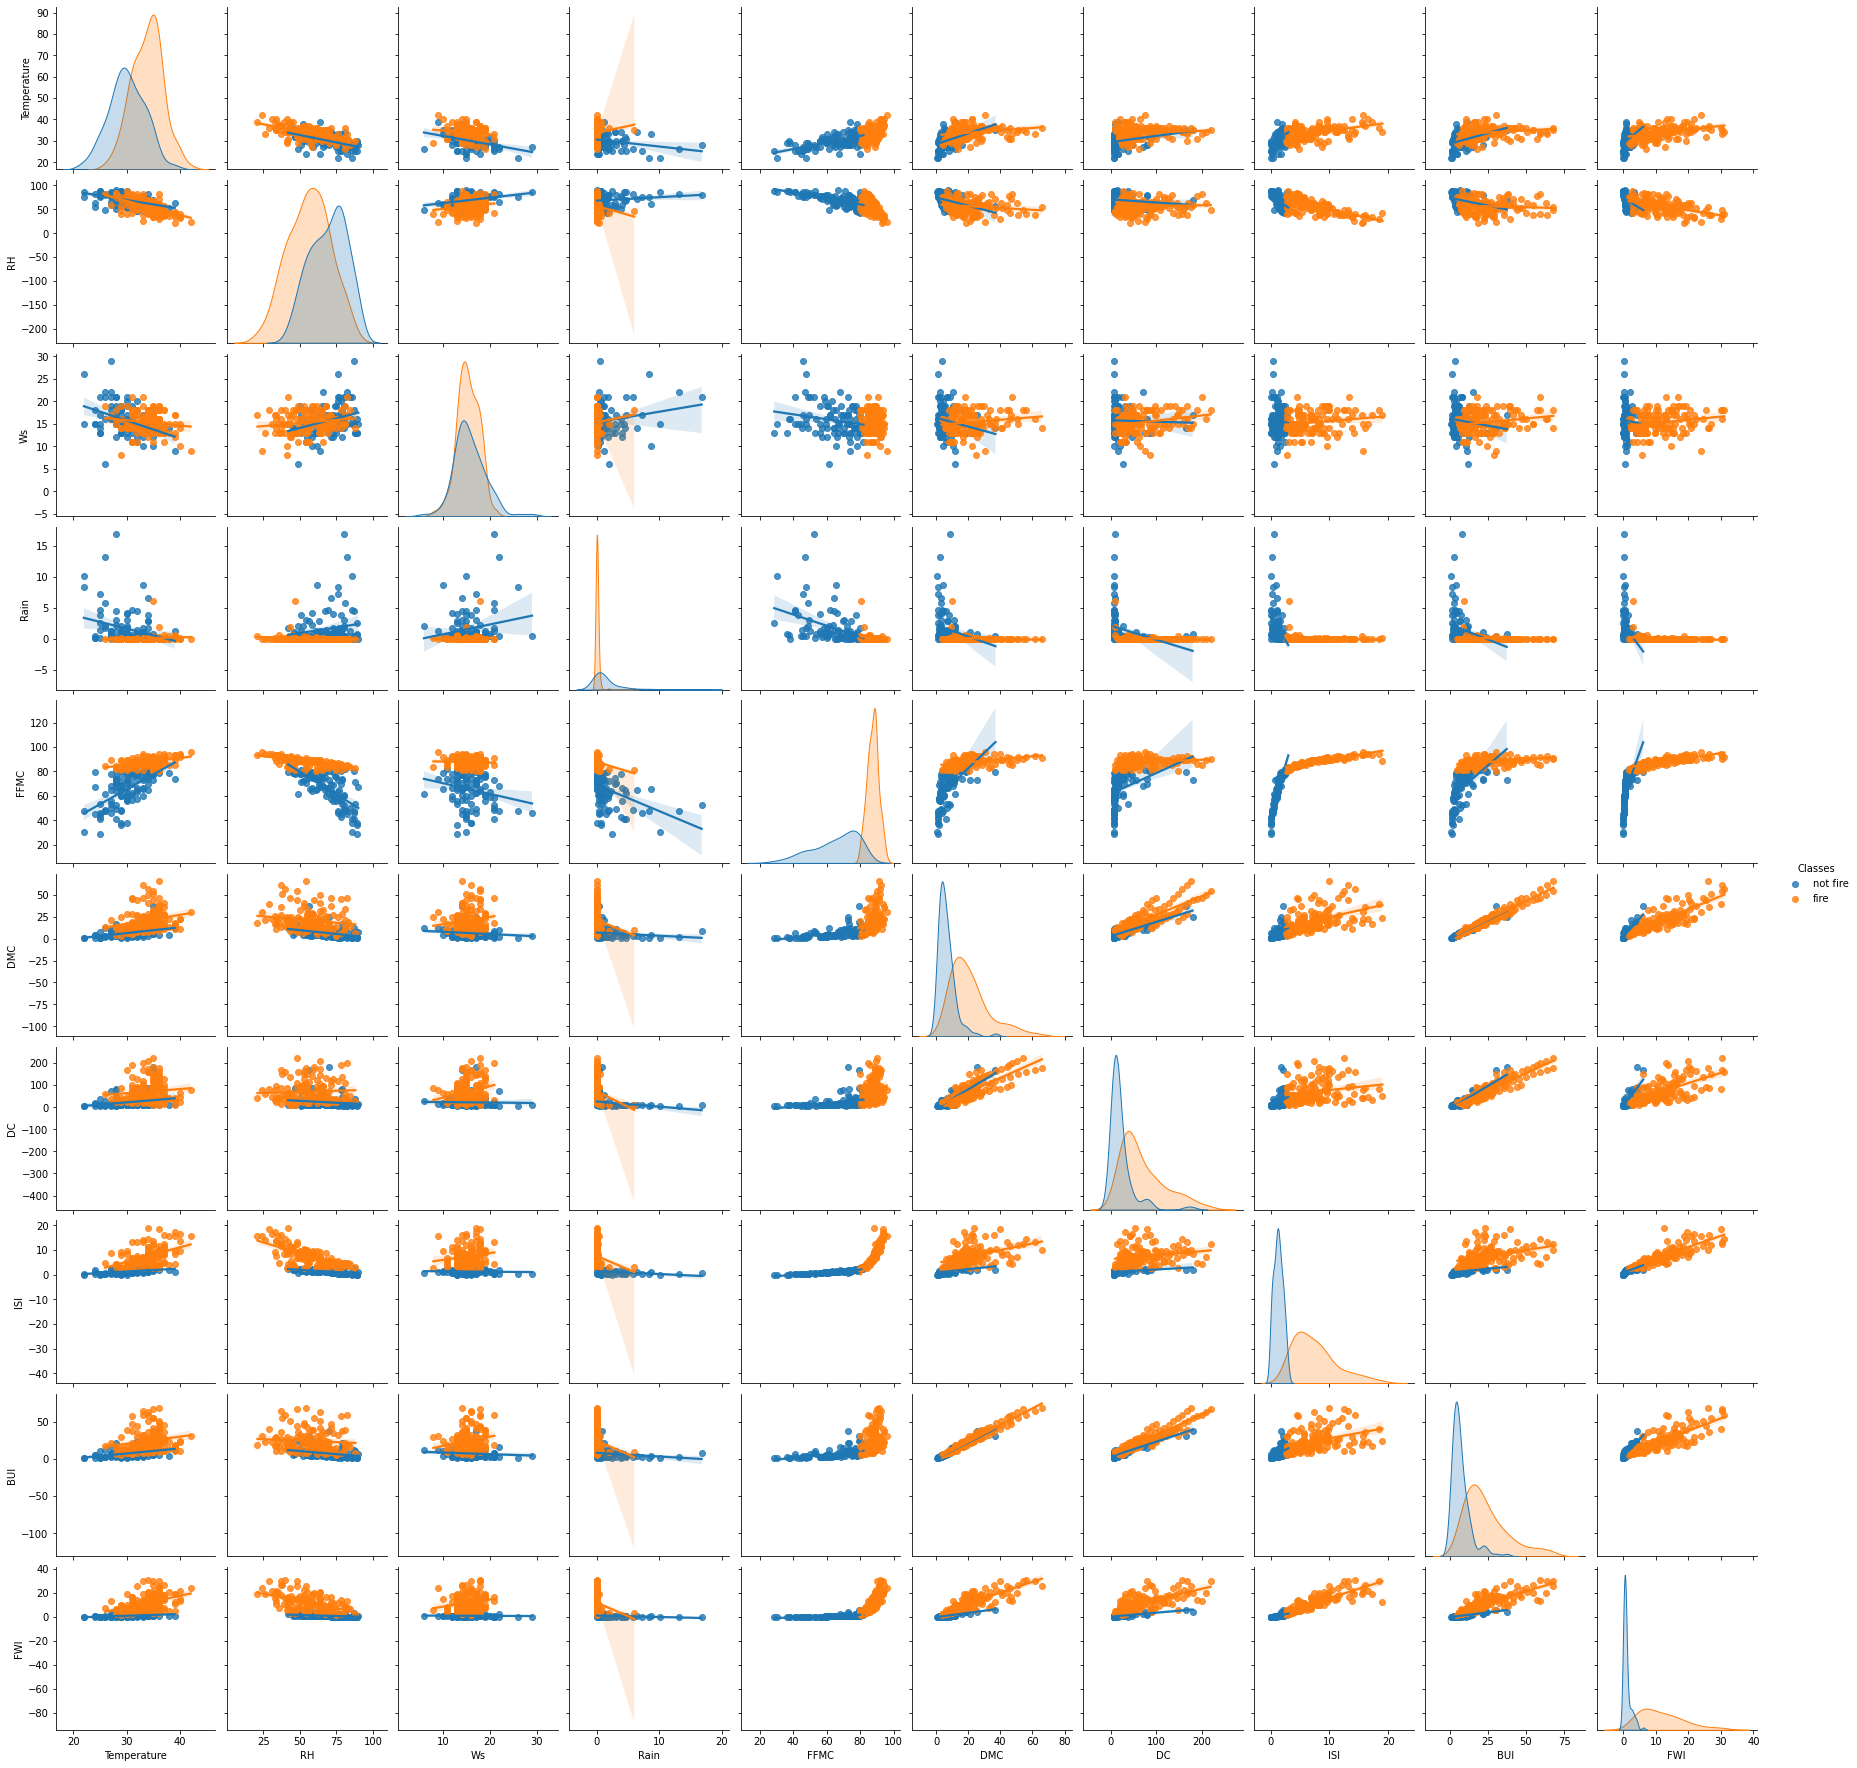

In [80]:
sns.pairplot(df1, hue = "Classes",kind='reg')

**Observations**
1.   higher 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI' higher chance of fire and vice versa.
2.   Higher rain less likely chance of froest fire.



**f) Multivariate analysis using heatmap using correlation between numerical features**

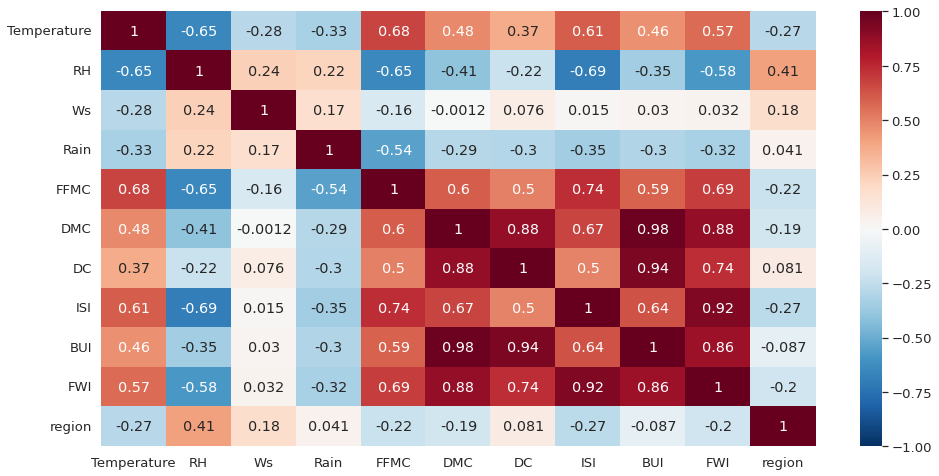

In [139]:
sns.set(font_scale =1.2)
plt.figure(figsize = (16,8))
sns.heatmap(df1.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

**Observations**
1.  Temperature is + related to FFMC and FWI and -ve related to RH
2.  RH is -vely related to ISI, FWI, Temp
3.  WS is isnot much correlated.
4.  Rain is -vely related with FFMC
5. FFMC is +vely releated with FWI, BUI, ISI, DC, DMC, Temp and -vely related with Rain and RH
6. DMC is  +vely related with DC, BUI, FWI (highly) and good with ISI
7. DC is +ve highly related with DMC, BUI, FWI and moderately with ISI
8. ISI is +vely related to FFMC, DMC, Dc, BUI, FWI & Temp and -vely related with RH
9. BUI is +ve highly related with DMC, DC, FWI and moderately with FFMC
10. FWI is highly related with DMC, FFMC, DC, ISI, BUI


**g) analysis between categorical and numerical features using box plot**

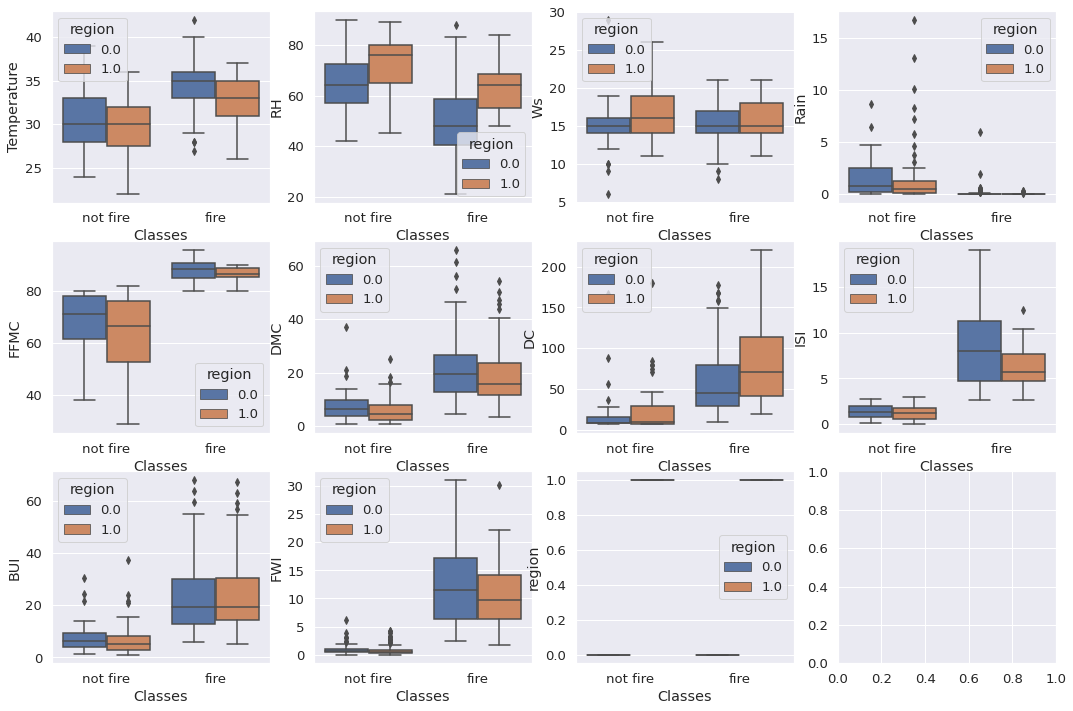

In [145]:
fig, ax = plt.subplots(3, 4, figsize=(18, 12))
for var, subplot in zip(numerical_features, ax.flatten()):
  sns.boxplot(y = var, x='Classes', data=df1, hue='region', ax=subplot)

**Observations**
1.  DC, DMC ISI FWI and BUI almost behaving the same.
2.  With temperature greater>32(in celsius) there is higher chance of fire
3. Relatively lower RH is the cause of the fire
4. Wind speed has not so much effect on fire
5. Rain reduces the chances of fire
6. With higher FMC>80 more likely chance of fire
7. With DMC >10 more likely chance of fire
8. With DC >40 more likely chance of fire
9. With ISI >5 more likely chance of fire
10. With BUI >8 more likely chance of fire
11. With FWI> 6 more likely chance of fire
12. Region 0 has higher temperature, FFMC, DMC, ISI, FWI and more rain while lower DC,RH than Region 1.

Conclusion:
1. Fire: No Rain, Lower RH
2. Fire: with increasing temperature,FMC, DMC, DC, ISI, FWI and BUI chances of fire is more likely.
3. Region and WS have almost no effect.
4. We have outliers in Rain, DC, DMC ISI FWI and BUI

**h) Box plot analysis why more forestfire in the month of August.**

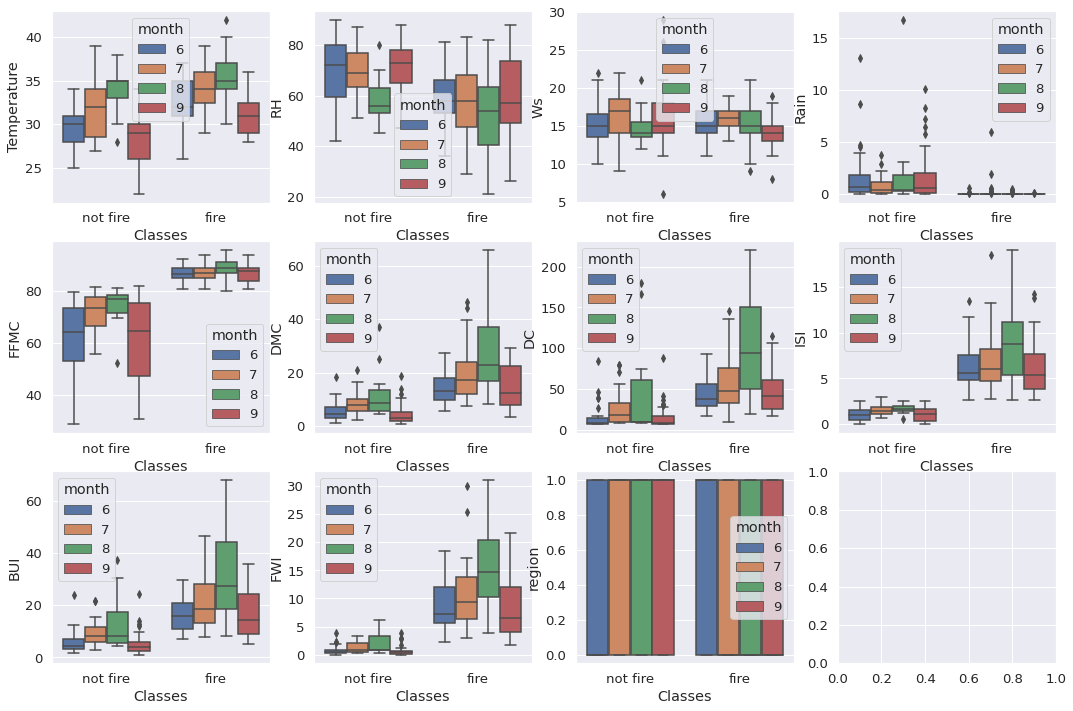

In [146]:
fig, ax = plt.subplots(3, 4, figsize=(18, 12))
for var, subplot in zip(numerical_features, ax.flatten()):
  sns.boxplot(y = var, x='Classes', data=df1, hue='month', ax=subplot)

**Observation**

1.   High Forest fire in August High [Temp, FFMC, DMC, DC, ISI, BUI, FWI and Low RH]


#**7) Analysis using pandas**

**a) Which Region is receiving more forest fire**

In [94]:
df1.groupby(['Classes','region'])['region'].count()

Classes   region
fire      0.0       79
          1.0       59
not fire  0.0       43
          1.0       63
Name: region, dtype: int64

**Observations**

1.   Region 0: more forest fire - 79
2.   Region 1: less forest fire - 59

Can be supported by observation at 6 g)

**) Which Month is receiving more forest fire**

In [96]:
df1[df1['Classes']=='fire'].groupby(['month'])['Classes'].count()

month
6    25
7    39
8    51
9    23
Name: Classes, dtype: int64

**Observation**
1.   August is receiving the maximum forest fires



In [100]:
df1[(df1['Classes']=='fire')&(df1['region']==0.0)][['FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].agg(['min', 'max'])

,FFMC,DMC,DC,ISI,BUI,FWI
min,80.2,4.4,9.7,2.7,6.0,2.5
max,96.0,65.9,177.3,19.0,68.0,31.1


In [98]:
df1[(df1['Classes']=='fire')&(df1['region']==1.0)][['FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].agg(['min', 'max'])

,FFMC,DMC,DC,ISI,BUI,FWI
min,80.2,3.4,19.8,2.6,5.1,1.7
max,90.3,54.2,220.4,12.5,67.4,30.2


1.  There is greater droungt code(DC) impact in Region 1
2.  Major reason for more forestfire in regions 0 is higher DMC value.

FFMC: Surface layer(1-2 cm deep)
DMC: Surface layer(5-10 cm deep)
DC: Surface layer(10-20 cm deep)

In [101]:
df1[df1['Classes']=='fire'][['FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].agg(['min', 'max'])

,FFMC,DMC,DC,ISI,BUI,FWI
min,80.2,3.4,9.7,2.6,5.1,1.7
max,96.0,65.9,220.4,19.0,68.0,31.1


range of values of 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI' and for catching the fire.

#**8. Final Summary**

1.There were two regions in sheet which were merged after creating a new column and dropping unnecessary rows.
2. Stripping of column names were done to remove white spaces. Similarly done with values of Class Column.
3. Data set have after modification 244 rows and 15 columns.
4. One values found at Row No. 168 in FWI.
5. Converted some feature variables ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI'] into numerical.
6. Then having Day, Month, Year, Classes - Categorical and else as  Numerical
7. Temperature, RH and Region fairly Distributed while Rain, DMC, DC,ISI, BUI,FWI are right screwed and FFMC left skewed.
8. Rain, DMC, DC,ISI, BUI,FWI, WS and FFMC have ouliers.
9. Dataset is about 4 monhts [June, July, August, September] of 2012.
10. Out of 244 rows of dataset 140(aprox) are the occurences of forest fire.
11. Max forest fire on 21st of month and no on 1st of the month.
12. higher 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI' higher chance of fire and vice versa.
13.   Higher rain less likely chance of froest fire.
14. Region 0 has more forest fire.



